In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

import os
os.chdir(r'D:\OneDrive\Documents\Course\Imarticus Learning\Tableau\Data')

In [11]:
mp=pd.read_excel('Monkeypox_Research_Summary_Data_20241024.xlsx', sheet_name='Monkeypox_Research_Summary_Data')
mp.head()

,Research Activity,"Project Title \n(and link to additional information, if available)",Topic,Agency and Office Name,Country(ies) in which research is/will be conducted,Status,Upcoming Milestones,Anticipated Completion,Brief Description,Project Link
0,Vaccine Immunogenicity Study,A Multicenter Trial Evaluating Alterative Dosi...,Vaccine,NIH/NIAID,Domestic,Active enrolling (started 9/9/2022),2023 Q1: Initial immunogenicity analysis (peak...,2023 Q2,"This study is a Phase 2 randomized, open-label...",https://clinicaltrials.gov/ct2/show/NCT0551294...
1,Vaccine Immunogenicity Study (Vaccine),A Multicenter Trial Evaluating Alterative Dosi...,Vaccine,NIH/NIAID,Domestic,Stage 2 of the above listed study.,2023 Q1 Enrollment to begin,2025,"This study is a Phase 2 randomized, open-label...",https://clinicaltrials.gov/ct2/show/NCT0551294...
2,Drug-Vaccine Interaction Study,Study to evaluate the immunogenicity profile a...,Vaccine,DoD/JPM CBRN Medical,USA,Ongoing,FY2023 Q3: Completion of Database Lock,2023-10-31T00:00:00.000,"This study is a Phase 2, randomized, open-labe...",https://clinicaltrials.gov/ct2/show/NCT04957485
3,Vaccine Effectiveness Study,National estimates of post-licensure vaccine p...,Vaccine,CDC,Domestic,Planned,2022 Q3: begin project data collection\n\n2023...,2023 Q2: multi-jurisdictional case-control study,CDC will: 1) Collect data from states and loca...,NaN
4,Vaccine Effectiveness Case Series Evaluation,Post-vaccination case series,Vaccine,CDC,Domestic,Planned,2022 Q3: project will begin data collection,Completed 2022 Q4,This is a post-vaccination case series to coll...,http://dx.doi.org/10.15585/mmwr.mm715152a2


In [12]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Research Activity                                                  71 non-null     object
 1   Project Title 
(and link to additional information, if available)  71 non-null     object
 2   Topic                                                              71 non-null     object
 3   Agency and Office Name                                             71 non-null     object
 4   Country(ies) in which research is/will be conducted                71 non-null     object
 5   Status                                                             71 non-null     object
 6   Upcoming Milestones                                                53 non-null     object
 7   Anticipated Completion               

In [13]:
mp.columns

Index(['Research Activity',
       'Project Title \n(and link to additional information, if available)',
       'Topic', 'Agency and Office Name',
       'Country(ies) in which research is/will be conducted', 'Status',
       'Upcoming Milestones', 'Anticipated Completion', 'Brief Description',
       'Project Link'],
      dtype='object')

In [14]:
mp.rename(columns={'Project Title \n(and link to additional information, if available)':'Project Title',
                  'Country(ies) in which research is/will be conducted': 'Country'},inplace=True) 
mp.drop(['Upcoming Milestones','Brief Description','Project Link'], axis=1, inplace=True)
mp.head()

,Research Activity,Project Title,Topic,Agency and Office Name,Country,Status,Anticipated Completion
0,Vaccine Immunogenicity Study,A Multicenter Trial Evaluating Alterative Dosi...,Vaccine,NIH/NIAID,Domestic,Active enrolling (started 9/9/2022),2023 Q2
1,Vaccine Immunogenicity Study (Vaccine),A Multicenter Trial Evaluating Alterative Dosi...,Vaccine,NIH/NIAID,Domestic,Stage 2 of the above listed study.,2025
2,Drug-Vaccine Interaction Study,Study to evaluate the immunogenicity profile a...,Vaccine,DoD/JPM CBRN Medical,USA,Ongoing,2023-10-31T00:00:00.000
3,Vaccine Effectiveness Study,National estimates of post-licensure vaccine p...,Vaccine,CDC,Domestic,Planned,2023 Q2: multi-jurisdictional case-control study
4,Vaccine Effectiveness Case Series Evaluation,Post-vaccination case series,Vaccine,CDC,Domestic,Planned,Completed 2022 Q4


In [15]:
mp.isnull().sum()

Research Activity          0
Project Title              0
Topic                      0
Agency and Office Name     0
Country                    0
Status                     0
Anticipated Completion    11
dtype: int64

In [16]:
mp.columns

Index(['Research Activity', 'Project Title', 'Topic', 'Agency and Office Name',
       'Country', 'Status', 'Anticipated Completion'],
      dtype='object')

In [20]:
cols=['Research Activity', 'Topic', 'Agency and Office Name',
       'Country', 'Status', 'Anticipated Completion']

for column in cols:
    unique_values = mp[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Research Activity: ['Vaccine Immunogenicity Study' 'Vaccine Immunogenicity Study (Vaccine)'
 'Drug-Vaccine Interaction Study' 'Vaccine Effectiveness Study'
 'Vaccine Effectiveness Case Series Evaluation'
 'Vaccine Utilization Study' 'Vaccine Safety Surveillance'
 'Novel Vaccine Evaluation' 'Next Generation Vaccine Research'
 'Vaccine efficacy' 'Real World Vaccine Efficacy Study Using VA Data'
 'Structural Biology Support'
 'Structural biology studies in support of vaccine and molecular therapeutics development'
 'Drug Safety and Tolerability Study' 'Monoclonal Antibody Discovery'
 'Therapeutic Efficacy Study'
 'Therapeutic Monoclonal antibody Development'
 'Monoclonal Antibody (mAb) Development Efforts' 'Therapeutic Development'
 'Diagnostic Development' 'Diagnostics' 'Diagnostic Assay Development'
 'Enhanced Diagnostics/Detection' 'Laboratory Safety'
 'Observational Study' 'Serologic assay development'
 'Virulence Potential Study' 'Transmission Study'
 'Human-Animal I

In [17]:

cols=['Research Activity', 'Project Title', 'Topic', 'Agency and Office Name',
       'Country', 'Status', 'Anticipated Completion']

fig, axes = plt.subplots(3,3, figsize=(50, 100)) 
axes = axes.flatten()  # Flatten the 2D array of axes for easier access

# Plotting each column
for i in range(len(cols)):
    sns.countplot(data=mp, y=cols[i], ax=axes[i])

plt.tight_layout()
plt.show()

In [21]:
mp.reset_index(drop=True, inplace=True)
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Research Activity       71 non-null     object
 1   Project Title           71 non-null     object
 2   Topic                   71 non-null     object
 3   Agency and Office Name  71 non-null     object
 4   Country                 71 non-null     object
 5   Status                  71 non-null     object
 6   Anticipated Completion  60 non-null     object
dtypes: object(7)
memory usage: 4.0+ KB


In [22]:
mp

,Research Activity,Project Title,Topic,Agency and Office Name,Country,Status,Anticipated Completion
0,Vaccine Immunogenicity Study,A Multicenter Trial Evaluating Alterative Dosi...,Vaccine,NIH/NIAID,Domestic,Active enrolling (started 9/9/2022),2023 Q2
1,Vaccine Immunogenicity Study (Vaccine),A Multicenter Trial Evaluating Alterative Dosi...,Vaccine,NIH/NIAID,Domestic,Stage 2 of the above listed study.,2025
2,Drug-Vaccine Interaction Study,Study to evaluate the immunogenicity profile a...,Vaccine,DoD/JPM CBRN Medical,USA,Ongoing,2023-10-31T00:00:00.000
3,Vaccine Effectiveness Study,National estimates of post-licensure vaccine p...,Vaccine,CDC,Domestic,Planned,2023 Q2: multi-jurisdictional case-control study
4,Vaccine Effectiveness Case Series Evaluation,Post-vaccination case series,Vaccine,CDC,Domestic,Planned,Completed 2022 Q4
...,...,...,...,...,...,...,...
66,Serosurveys and Improved Serological Surveys,Development of a mpoxspecific immunoassay,Epidemiology,USDA Agricultural Research Service,TBD,Planned,TBD
67,Biosurveillance study,Mpox Threat Reduction Network (MPX-TRN): Using...,Epidemiology,DTRA-CTR/BTRP,"International: Democratic Republic of Congo, U...",Ongoing,Base period ends: 2024 Q3
68,Education and Training,Sample Collection Training and Capacity Building,Education,WRAIR,International: West Africa,Closing out both training iterations,2023 Q3
69,International Training and equipment upgrades/...,Enhancing Biosafety and Biosecurity of High Co...,Education,DOS/ISN,International: DRC,Ongoing,2022 Q4


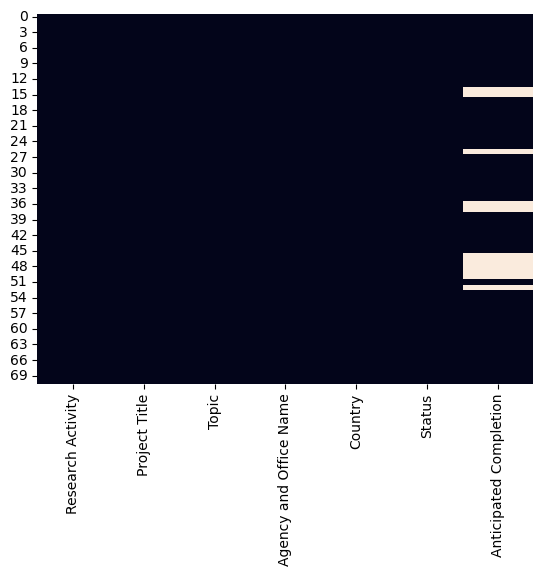

In [23]:
sns.heatmap(mp.isnull(), cbar=False)
plt.show()

In [27]:
mp.to_excel('Monkeypox research data cleaned.xlsx' ,sheet_name='cleaned data')

print("Data exported successfully!")

Data exported successfully!
